In [2]:
# Exercice 1
PATH = "email-Eu-core.txt/"

In [3]:
def readFile(f,Path = PATH, char_separateur = " "):
    lines = open(Path + f,"r").read()[:-1].split("\n")
    while lines[0][0] == "#":
        del lines[0]

    D = {}
    lines = [ i.split(char_separateur) for i in lines]
    for line in lines:
        map(int,line)
        if int(line[0]) > int(line[1]): line[0],line[1] = line[1],line[0]
    lines.sort()
        
    for i in range(0,len(lines)):
        line = lines[i]
        if line[0] == line[1]: continue
        if i != len(lines) - 1 and lines[i] == lines[i+1]: continue
        
        D[line[0]] = D.get(line[0],[]) + [line[1]]
        D[line[1]] = D.get(line[1],[]) + [line[0]]
    
    return D

In [4]:
def ajouter(tas, noeud, degre, indices_tas):
    indices_tas[noeud] = len(tas)
    tas.extend([[noeud,degre]])
    index = len(tas) - 1
    while index > 0 and tas[(index - 1)//2][1] > tas[index][1]:
        indices_tas[tas[(index - 1)//2][0]],indices_tas[tas[index][0]] = indices_tas[tas[index][0]],indices_tas[tas[(index - 1)>>1][0]]
        tas[(index - 1)//2],tas[index] = tas[index],tas[(index - 1)>>1]
        index = (index - 1)>>1            
    return tas, indices_tas

In [5]:
def percolate(tas, index, indices_tas) :
    left = index*2+1
    right = index*2+2
    
    if left < len(tas):
        if tas[left][1] < tas[index][1]:
            indices_tas[tas[left][0]], indices_tas[tas[index][0]] = indices_tas[tas[index][0]],indices_tas[tas[left][0]]
            tas[left], tas[index] = tas[index],tas[left]
            tas, indices_tas = percolate(tas, left, indices_tas)
    
    if right < len(tas):
        if tas[right][1] < tas[index][1]:
            indices_tas[tas[right][0]],indices_tas[tas[index][0]] = indices_tas[tas[index][0]],indices_tas[tas[right][0]]
            tas[right], tas[index] = tas[index],tas[right]
            tas, indices_tas = percolate(tas, right, indices_tas)
    
    return tas, indices_tas

In [6]:
def percolate_inverse(tas, index, indices_tas):
    if index <= 2:
        return tas, indices_tas
    
    pere = (index-1)//2
    
    if (tas[index][1] < tas[pere][1]):
        tas[index], tas[pere] = tas[pere], tas[index]
        indices_tas[tas[index][0]], indices_tas[tas[pere][0]] = indices_tas[tas[pere][0]], indices_tas[tas[index][0]]
        tas, indices_tas = percolate_inverse(tas, pere, indices_tas)
    
    return tas, indices_tas

In [7]:
def supprimer(tas, indices_tas) :
    if len(tas) < 1:
         return [], indices_tas
    
    indices_tas[tas[0][0]] = -1
    
    if len(tas) == 1:
        return [], indices_tas
    
    tas[0] = tas[-1]
    indices_tas[tas[0][0]] = 0
    del(tas[-1])
    
    tas, indices_tas = percolate(tas, 0 , indices_tas)
    
    return tas, indices_tas

In [8]:
def tas_min(D) : 
    tas = []
    indices_tas = {}
    for k in D.keys():
        tas, indices_tas = ajouter(tas, k, len(D[k]), indices_tas)
    return tas, indices_tas

In [9]:
def maj(D, tas, noeud, degre, indices_tas) :
    for voisin in D[noeud]:
        if indices_tas[voisin] != -1:
            tas[indices_tas[voisin]][1] -= 1
            tas, indices_tas = percolate_inverse(tas, indices_tas[voisin] , indices_tas)
     
    return tas, indices_tas

In [10]:
def core_decomposition(D) :
    c = 0
    res = []
    tas, indices_tas = tas_min(D)
    indices_decomp = {}
    i = len(tas) - 1
    
    while len(tas) > 0:
        c = max(c, tas[0][1])
        res.append([tas[0][0], c])
        indices_decomp[tas[0][0]] = i
        tas, indices_tas = maj(D, tas, tas[0][0], tas[0][1], indices_tas)
        tas, indices_tas = supprimer(tas, indices_tas)
        i -= 1
    res.reverse()
    return res, indices_decomp

In [11]:
def densest_core_ordering_prefix(D):
    decomp, indices_decomposition = core_decomposition(D)
    densest_core = 0
    nb_noeuds = 0
    nb_edges = 0
    print(decomp[:20])
    for i in range(len(decomp)):
        for voisin in D[decomp[i][0]]:
            if indices_decomposition[voisin] < i:
                nb_edges += 1
        
        average = nb_edges/(i+1)
        
        if average > densest_core:
            densest_core = average
            nb_noeuds = i+1
                
        if i%100000 == 0:
            print(i)

    print("FIN DE ORDERING PREFIX")
    print("average degree density, edge density, size prefix")
    return densest_core, densest_core/(nb_noeuds-1), nb_noeuds

In [12]:
d = readFile("email-Eu-core-clean.txt")
#d = readFile("email-Eu-core-clean.txt","/Vrac/TME_CPA_19-02-20/")
#d = readFile("com-amazon.ungraph-clean.txt","/Vrac/TME_CPA_19-02-20/","\t")
#d = readFile("com-lj.ungraph-clean.txt","/Vrac/TME_CPA_19-02-20/","\t")
#d = readFile("com-orkut.ungraph-clean.txt","/Vrac/TME_CPA_19-02-20/","\t")
print("fin du readFile")

print("Densest core value")
print(densest_core_ordering_prefix(d))

fin du readFile
Densest core value
[['114', 34], ['107', 34], ['128', 34], ['129', 34], ['183', 34], ['121', 34], ['81', 34], ['212', 34], ['21', 34], ['329', 34], ['87', 34], ['303', 34], ['160', 34], ['371', 34], ['249', 34], ['82', 34], ['28', 34], ['169', 34], ['105', 34], ['405', 34]]
0
FIN DE ORDERING PREFIX
average degree density, edge density, size prefix
(27.56637168141593, 0.12251720747295969, 226)


In [13]:
#Exercice 2
import matplotlib.pyplot as plt
import numpy as np

g = readFile("net.txt", "scholar/")

core, z = core_decomposition(g)
print("fin du core_decomposition")

for noeud in core :
    noeud += [len(g[noeud[0]])]


fin du core_decomposition


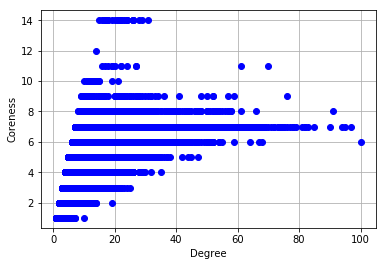

In [14]:
plt.grid(True)
plt.ylabel("Coreness")
plt.xlabel("Degree")
plt.plot([core[i][2] for i in range(len(core))],\
         [core[i][1] for i in range(len(core))],"bo") #x,y
plt.show()

In [28]:
#Exercice 3
def readFile_oriente(f,Path = PATH, char_separateur = " "):

    lines = open(Path + f,"r").read()[:-1].split("\n")
    while lines[0][0] == "#":
        del lines[0]
    D = {}
    D_oriente = {}
    lines = [ i.split(char_separateur) for i in lines]
    for line in lines:
        map(int,line)
        if int(line[0]) > int(line[1]): line[0],line[1] = line[1],line[0]
    lines.sort()
        
    for i in range(0,len(lines)):
        line = lines[i]
        if line[0] == line[1]: continue
        if i != len(lines) - 1 and lines[i] == lines[i+1]: continue
            
        if int(line[0]) < int(line[1]) :
            D_oriente[line[0]] = D_oriente.get(line[0],[]) + [line[1]]
        
        D[line[0]] = D.get(line[0],[]) + [line[1]]
        D[line[1]] = D.get(line[1],[]) + [line[0]]
        
    return D, D_oriente

In [29]:
def density_score(D, t = 10):
    r = {}    
    for noeud in D.keys():
        r[noeud] = 0
    
    for noeuds in D.values():
        for noeud in noeuds :
            r[noeud] = 0
        
    for i in range(t):
        for noeud in D.keys():
            for voisin in D[noeud]: 
                if r[noeud] <= r[voisin]:
                    r[noeud] += 1
                else:
                    r[voisin] += 1
    
    for n in r.keys():
        r[n] = r[n]/t
    
    return r

In [30]:
import operator

def sorted_density_score(score_dico):
    indices_score = {}
    sorted_list = []
    for s in score_dico.keys() :
        sorted_list.append([int(s), score_dico[s]])
        
    sorted_list.sort(key = operator.itemgetter(1))
    sorted_list.reverse()
    
    indice = 0
    for e in sorted_list :
        indices_score[str(e[0])] = indice
        indice += 1
    return sorted_list, indices_score

In [31]:
def densest_core_ordering_density_score(D, D_oriente, t = 10):
    score, indices_score = sorted_density_score(density_score(D_oriente, t))
    
    densest_score = 0
    nb_noeuds = 0
    nb_edges = 0
    print(score[:5])
    
    for i in range(len(score)):
        for voisin in D.get(str(score[i][0]),[]):
            if indices_score[voisin] < i:
                nb_edges += 1
        
        average = nb_edges/(i+1)
        
        if average > densest_score:
            densest_score = average
            nb_noeuds = i+1
        
        if i%100000 == 0:
            print(i)
                
    print("FIN DE ORDERING PREFIX")
    print("average degree density, edge density, size prefix")
    return densest_score, densest_score/(nb_noeuds-1), nb_noeuds

In [32]:
#D = readFile("email-Eu-core-clean.txt","/Vrac/TME_CPA_19-02-20/")

D, D_oriente = readFile_oriente("email-Eu-core-clean.txt")

#D, D_oriente = readFile_oriente("com-amazon.ungraph-clean.txt",PATH,"\t")


In [33]:
densest_core_ordering_density_score(D, D_oriente,100)

[[87, 27.73], [859, 27.73], [856, 27.73], [820, 27.73], [932, 27.72]]
0
FIN DE ORDERING PREFIX
average degree density, edge density, size prefix


(27.56578947368421, 0.12143519591931369, 228)